In [1]:
# Import required libraries
import polars as pl
import  lightgbm as lgm
from sklearn.model_selection import train_test_split

In [2]:
# Load a CSV and create a DataFrame
df = pl.read_csv('../../buckets/b1/datasets/dataset_pequeno.csv', ignore_errors=True)



In [3]:
training_month = [ 202107 ]
testing_month = [ 202109 ]

In [4]:
df = df.with_columns(pl.col("clase_ternaria")\
    .map_elements(lambda x : 1 if x == "BAJA+2" or x =="BAJA+1" else 0, None)\
    .alias("clase01"))
df = df.filter(pl.col("foto_mes").is_in(training_month))
df = df.with_columns(pl.col('Master_Finiciomora').map_elements(lambda x : int(x) if x != "None" else None).alias("Master_Finiciomora"))
df = df.with_columns(pl.col('Visa_Finiciomora').map_elements(lambda x : int(x) if x != "None" else None).alias("Visa_Finiciomora"))

In [5]:
set( df['Master_Finiciomora'] )


{10,
 103,
 110,
 117,
 12,
 131,
 138,
 145,
 159,
 17,
 173,
 180,
 19,
 194,
 201,
 24,
 26,
 3,
 33,
 39,
 5,
 52,
 54,
 58,
 60,
 66,
 75,
 82,
 89,
 None}

In [6]:
# Convert polars df to pandas df for lightgbm compatibility
df_pandas = df.to_pandas()
# Assuming your label column is named 'target'
y = df_pandas['clase01']
X = df_pandas.drop(['clase01', 'clase_ternaria'] , axis=1)

In [7]:
# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(131745, 154)

In [9]:
# Execute lightgbm with the default hyperparameters
model = lgm.LGBMClassifier(
    max_depth=10,
    max_bin=31,
    learning_rate=0.0100746999,
    feature_fraction=0.5144127527,
    num_iterations=559,
    min_data_in_leaf=505,
    num_leaves=44,
)
model.fit(X_train, y_train)


/Users/fede/.local/share/virtualenvs/dm2023b-5bDqIQzz/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.5144127527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5144127527
[LightGBM] [Warning] min_data_in_leaf is set=505, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=505
[LightGBM] [Warning] feature_fraction is set=0.5144127527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5144127527
[LightGBM] [Warning] min_data_in_leaf is set=505, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=505
[LightGBM] [Info] Number of positive: 1871, number of negative: 129874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3307
[LightGBM] [Info] Number of data points in the train set: 131745, number of used features: 141
[LightGBM] [Info] [binary:BoostFromScore]:

LGBMClassifier(feature_fraction=0.5144127527, learning_rate=0.0100746999,
               max_bin=31, max_depth=10, min_data_in_leaf=505,
               num_iterations=559, num_leaves=44)

In [10]:
y_pred = model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.5144127527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5144127527
[LightGBM] [Warning] min_data_in_leaf is set=505, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=505


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

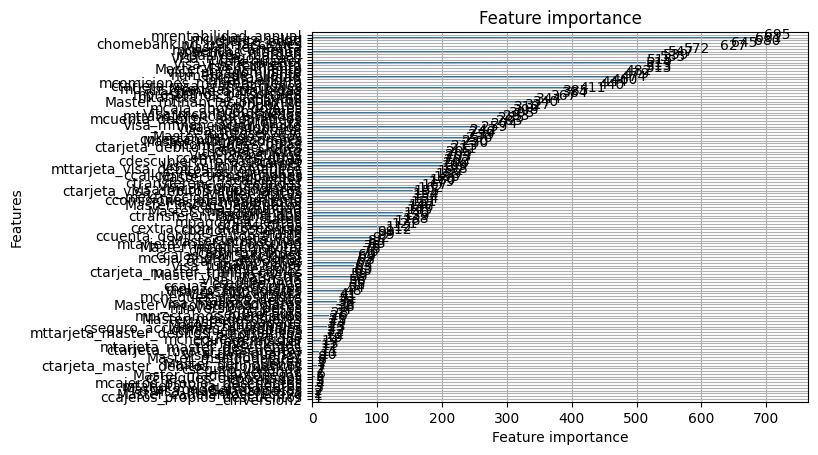

In [11]:
lgm.plot_importance(model)